# Startup Breakfast

- Gdrive: [projects/startup_breakfast](https://drive.google.com/drive/u/0/folders/1mzB_Savzdvwk738c77LPcyJ63Hg8IBji)
- Google Doc: [projects/startup_breakfastStartup breakfast painting notebook.gdoc](https://docs.google.com/document/d/1ypyphlBYu0VMZq5x23bAlFRMzVNQUe5qNIVSDb0UnQc/edit#heading=h.wo1kqu1219dz)
- Gphotos: [painting--process--startup-breakfast](https://photos.google.com/share/AF1QipPMej2xdCIUXMoXGJrF9ndZrSoKHDKo_oymKiQ7a4wLrKlfKlTYWG_knvKmkdtYhQ?key=MDZBWF80WDNBb2I3S1RQNHV0WWg4bmNZT3pZTmxR)
- Original Colab Notebook: [deepdream_caffe_setup.ipynb](https://colab.research.google.com/drive/19O8W1zhk56TWs2VR6GlK8fj12Es58QM9)
- (this one) Draft Colab Notebook: [deepdream--startup-breakfast--assembling.ipynb](https://colab.research.google.com/drive/1PzyHV-UhQlsvn1ahA0o2wybOOUCCHfLX#scrollTo=1AAX1jpOpeX_)


In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
!mkdir -p drive
!google-drive-ocamlfuse drive

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [1]:
!ls ./drive

ls: cannot access './drive': No such file or directory


In [3]:
import os
PROJECT_DIR = 'drive/projects/startup_breakfast/'
os.chdir(PROJECT_DIR)
!ls 

2c123f16f44652320635c0bf9bb1cef0911eec52.jpg
32145d10a4841e67ee388a5d058f3cf4782124e3.jpg
3-breakfast-normal.jpg
3-breakfast-normal-orig.jpg
4601e2f7ee12e9b5d2ef915a4eb4eceae1e2c7fd.jpg
4-breakfast-dream.jpg
context_caff1.jpg
context_caff2.jpg
context_hack1.jpg
context_hack2.jpg
context_meager.jpg
context_thinkpad.jpg
download333.jpeg
download333.jpg
download777.jpeg
download777.jpg
download888.jpeg
download888.jpg
dream_0000.jpg
dream_0001.jpg
dream_0002.jpg
dream__breakfast-dream.jpg
dream_closeup_dogslug.png
dream_closeup_gremlins2.jpg
dream_closeup_gremlins.jpg
dream_closeup_hotpocket_bear.png
dream_closeup_keyboard_dog.png
dream_closeup_plate.jpg
dream_download333.jpg
dream_download777.jpg
dream_download888.jpg
dream.ipynb
dream_orig.ipynb
ex_class.py
ex_deepdream.py
IMAG0982.jpg
IMAG0996.jpg
IMAG1049.jpg
IMAG1050.jpg
IMAG1051.jpg
IMAG1102.jpg
IMAG1158.jpg
IMG_3358.jpg
IMG_3470.png
IMG_3471.png
IMG_3472.png
IMG_3473.png
IMG_3474.png
IMG_3601.jpg
IMG_3602.jpg
IMG_3603.jpg
IMG_3624.

In [0]:
from IPython import display as ipyd

In [5]:
!pip install scikit-image
from skimage import io
# http://scikit-image.org/docs/dev/api/skimage.transform.html
from skimage.transform import resize
from IPython import display as ipyd

# from https://stackoverflow.com/questions/39382412/crop-center-portion-of-a-numpy-image
def crop_center(img, cropx, cropy):
    y, x, _ = img.shape
    startx = x // 2 - (cropx // 2)
    starty = y // 2 - (cropy // 2)    
    return img[starty:starty+cropy, startx:startx+cropx, :]
 
def square_shrink(img, dim=224):
  smaller_dim = min(img.shape[:2])
  cropped = crop_center(img, smaller_dim, smaller_dim)
  small_cropped = resize(cropped, (dim, dim, img.shape[2]))
  return small_cropped

def load_small(fname):
  img = io.imread(fname)
  small_img = square_shrink(img)
  return small_img

In [0]:
from IPython.display import Image

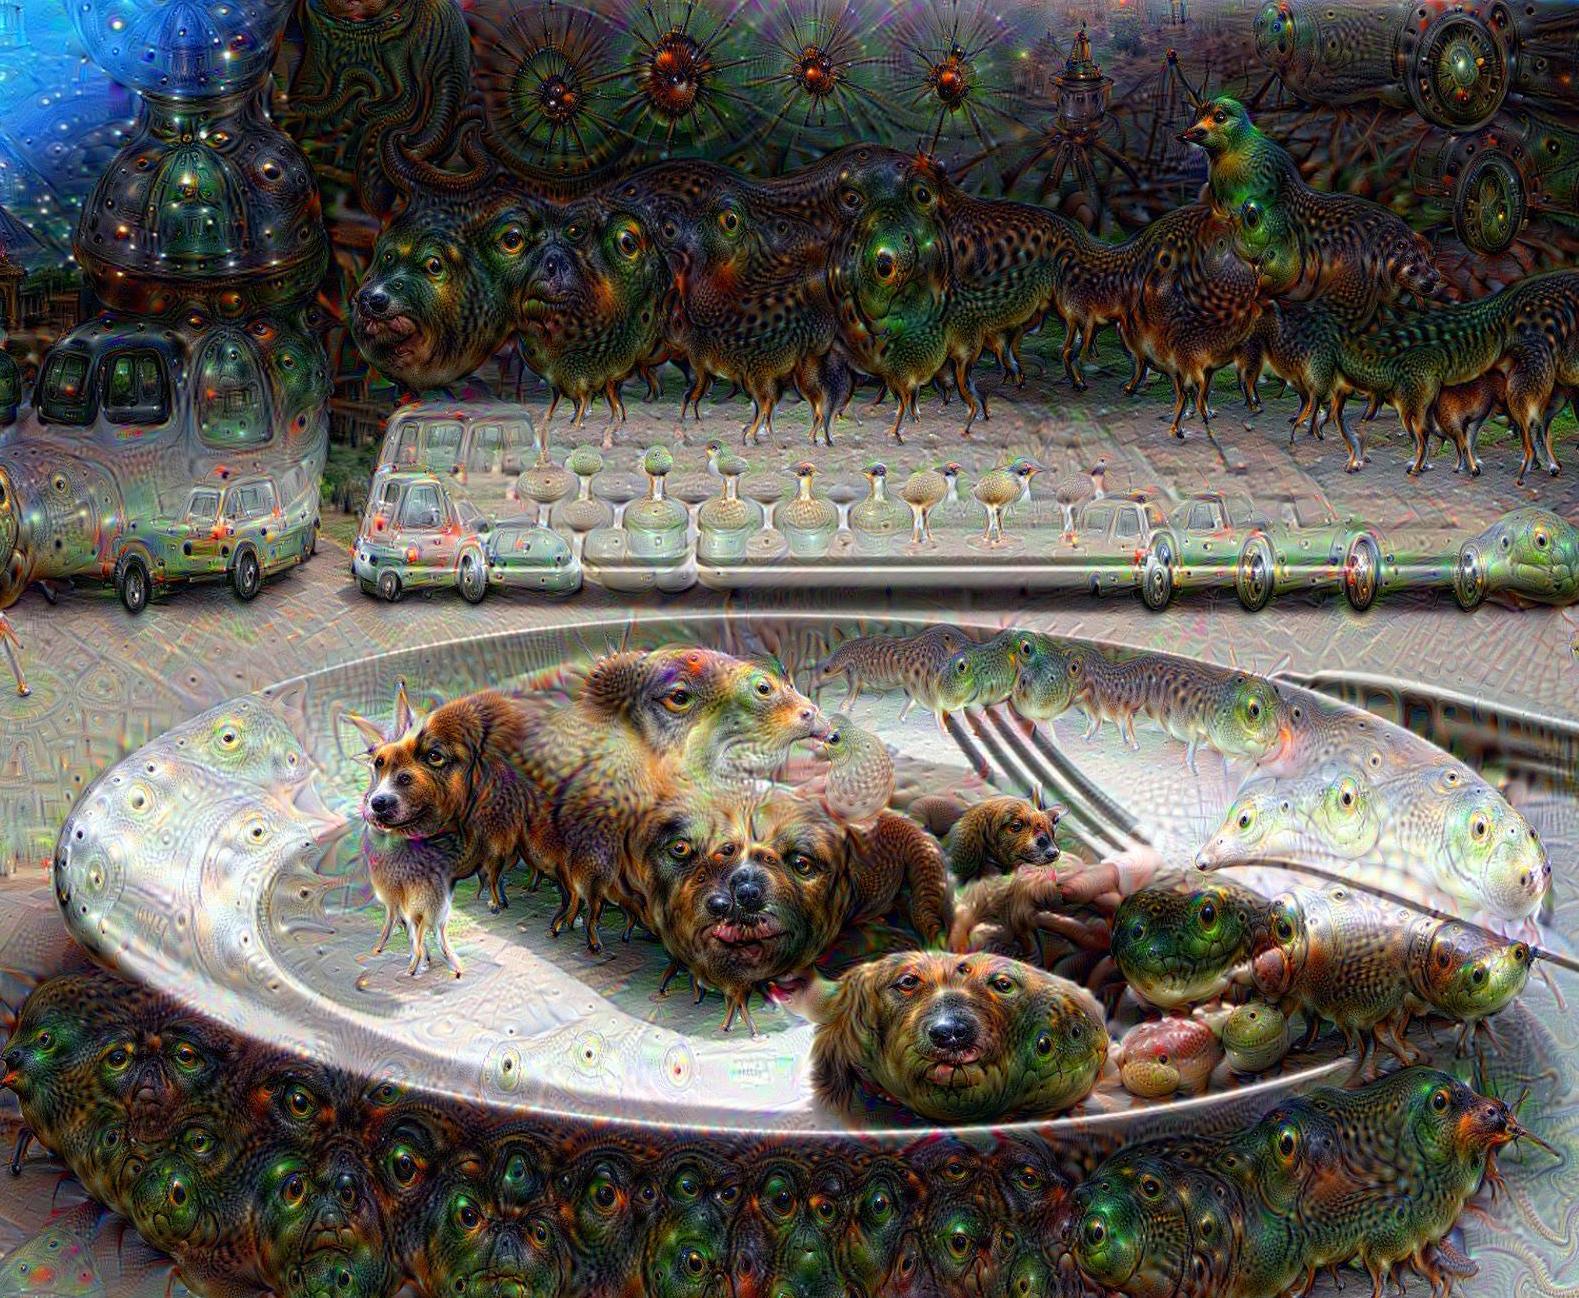

In [9]:
Image(filename='download888.jpeg')

In [0]:
from lucid.misc.io.showing import image, images, show

# Semantic Dictionaries




## Install / Import / Load

This code depends on [Lucid](https://github.com/tensorflow/lucid) (our visualization library), and [svelte](https://svelte.technology/) (a web framework). The following cell will install both of them, and dependancies such as TensorFlow. And then import them as appropriate.

In [0]:
!pip install --quiet lucid==0.0.5
!npm install -g svelte-cli@2.2.0

import numpy as np
import tensorflow as tf

import lucid.modelzoo.vision_models as models
import lucid.optvis.render as render
from lucid.misc.io import show, load
from lucid.misc.io.showing import _image_url
import lucid.scratch.web.svelte as lucid_svelte

/tools/node/bin/svelte -> /tools/node/lib/node_modules/svelte-cli/bin.js
/tools/node/lib
└── svelte-cli@2.2.0 



## Semantic Dictionary Code

### **Defining the interface**

First, we define our "semantic dictionary" interface as a [svelte component](https://svelte.technology/). This makes it easy to manage state, like which position we're looking at.

In [0]:
%%html_define_svelte SemanticDict

<div class="figure">
    <div class="input_image">
        <div class="image" style="background-image: url({{image_url}}); z-index: -10;"></div>
        <svg class="pointer_container" viewBox="0 0 {{N[0]}} {{N[1]}}">

            {{#each xs as x}}
            {{#each ys as y}}
              <rect x={{x}} y={{y}} width=1 height=1
                class={{(x == pos[0] && y == pos[1])? "selected" : "unselected"}}
                on:mouseover="set({pos: [x,y]})"></rect>
            {{/each}}
            {{/each}}
        </svg>
    </div>
    <div class="dict" >
        {{#each present_acts as act, act_ind}}
        <div class="entry">
            <div class="sprite" style="background-image: url({{spritemap_url}}); width: {{sprite_size}}px; height: {{sprite_size}}px; background-position: -{{sprite_size*(act.n%sprite_n_wrap)}}px -{{sprite_size*Math.floor(act.n/sprite_n_wrap)}}px; --info: {{act.n}};"></div>
            <div class="value" style="height: {{sprite_size*act.v/1000.0}}px;"></div>
        </div>
        {{/each}}
    </div>
</div>


<style>
    .figure {
        padding: 10px;
        width: 1024px;
    }
    .input_image {
        display: inline-block;
        width: 224px;
        height: 224px;
    }
    .input_image .image, .input_image .pointer_constainer {
        position: absolute;
        width: 224px;
        height: 224px;
        border-radius: 8px;
    }
    .pointer_container rect {
      opacity: 0;
    }
    .pointer_container .selected {
      opacity: 1;
      fill: none;
      stroke: hsl(24, 100%, 50%);
      stroke-width: 0.1px;
    }
    
    .dict {
        height: 128px;
        display: inline-block;
        vertical-align: bottom;
        padding-bottom: 64px;
        margin-left: 64px;
    }
    .entry {
        margin-top: 9px;
        margin-right: 32px;
        display: inline-block;
    }
    .value {
        display: inline-block;
        width: 32px;
        border-radius: 8px;
        background: #777;
    }
    .sprite {
        display: inline-block;
        border-radius: 8px;
    }
    .dict-text {
        display: none;
        font-size: 24px;
        color: #AAA;
        margin-bottom: 20px;
    }
</style>

<script>
    
  function range(n){
    return Array(n).fill().map((_, i) => i);
  }
  
  export default {
    data () {
      return {
        spritemap_url: "",
        sprite_size: 64,
        sprite_n_wrap: 1e8,
        image_url: "",
        activations: [[[{n: 0, v: 1}]]],
        pos: [0,0]
      };
    },
    computed: {
      present_acts: (activations, pos) => activations[pos[1]][pos[0]],
      N: activations => [activations.length, activations[0].length],
      xs: (N) => range(N[0]),
      ys: (N) => range(N[1])
    },
    helpers: {range}
  };
</script>

Trying to build svelte component from html...
svelte compile --format iife /tmp/svelte_s9QXjh/SemanticDict_16ff127.html > /tmp/svelte_s9QXjh/SemanticDict_16ff127.js
svelte version 1.58.4
compiling ../../../../tmp/svelte_s9QXjh/SemanticDict_16ff127.html...



In [0]:
# ## **Spritemaps**
# 
# In order to use the semantic dictionaries, we need "spritemaps" of channel 
# visualizations. These visualization spritemaps are large grids of images
# (such as [this one](https://storage.googleapis.com/lucid-static/building-blocks/sprite_mixed4d_channel.jpeg))
# that visualize every channel in a layer. We provide spritemaps for GoogLeNet
# because making them takes a few hours of GPU time, but you can make your own
# channel spritemaps to explore other models. Check out other notebooks on how
# to make your own neuron visualizations. It's also worth noting that GoogLeNet
# has unusually semantically meaningful neurons. We don't know why this is --
# although it's an active area of research for us. More sophisticated
# interfaces, such as neuron groups, may work better for networks where
# meaningful ideas are more entangled or less aligned with the neuron
# directions.
layer_spritemap_sizes = {
    'mixed3a' : 16,
    'mixed3b' : 21,
    'mixed4a' : 22,
    'mixed4b' : 22,
    'mixed4c' : 22,
    'mixed4d' : 22,
    'mixed4e' : 28,
    'mixed5a' : 28,
  }

def googlenet_spritemap(layer):
  assert layer in layer_spritemap_sizes
  size = layer_spritemap_sizes[layer]
  url = "https://storage.googleapis.com/lucid-static/building-blocks/googlenet_spritemaps/sprite_%s_channel_alpha.jpeg" % layer
  return size, url

googlenet = models.InceptionV1()
googlenet.load_graphdef()


def googlenet_semantic_dict_from_url(layer, img_url):
    img = load(img_url)
    googlenet_semantic_dict(layer, img)
    
# ## **User facing constructor**
# Now we'll create a convenient API for creating semantic dictionary
# visualizations. It will compute the network activations for an image,
# grab an appropriate spritemap, and render the interface.
def googlenet_semantic_dict(layer, img):    
    # Compute the activations
    with tf.Graph().as_default(), tf.Session():
        t_input = tf.placeholder(tf.float32, [224, 224, 3])
        T = render.import_model(googlenet, t_input, t_input)
        acts = T(layer).eval({t_input: img})[0]
    
    # Find the most interesting position for our initial view
    max_mag = acts.max(-1)
    max_x = np.argmax(max_mag.max(-1))
    max_y = np.argmax(max_mag[max_x])
    
    # Find appropriate spritemap
    spritemap_n, spritemap_url = googlenet_spritemap(layer)
    
    # Actually construct the semantic dictionary interface
    # using our *custom component*
    lucid_svelte.SemanticDict({
        "spritemap_url": spritemap_url,
        "sprite_size": 110,
        "sprite_n_wrap": spritemap_n,
        "image_url": _image_url(img),
        "activations": [[[{"n": n, "v": float(act_vec[n])} for n in np.argsort(-act_vec)[:4]] for act_vec in act_slice] for act_slice in acts],
        "pos" : [max_y, max_x]
    })

# Now let's make some semantic dictionaries!


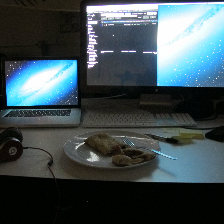

In [0]:
googlenet_semantic_dict("mixed4d", cropped224)


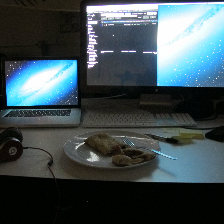

In [0]:
googlenet_semantic_dict("mixed4c", cropped224)

In [0]:
io.imshow(small_jpgs)

In [0]:
googlenet = models.InceptionV1()
googlenet.load_graphdef()


In [0]:
def eval_layer_for_img(layer, img):
  # Compute the activations
  with tf.Graph().as_default(), tf.Session():
    t_input = tf.placeholder(tf.float32, [224, 224, 3])
    T = render.import_model(googlenet, t_input, t_input)
    acts = T(layer).eval({t_input: img})[0]
    return acts

In [0]:
len(small_imgs)

69

In [0]:
eval_layer_for_img("mixed4d", small_imgs[0])

array([[[  7.7093287 ,   0.        ,  55.704494  , ...,   0.        ,
          18.200909  ,  55.03609   ],
        [  0.        ,   0.        ,  66.967064  , ...,   0.        ,
          69.80016   ,  49.78654   ],
        [  0.        ,   0.        ,  90.88968   , ...,   0.        ,
          90.31891   ,  33.68149   ],
        ...,
        [  3.26542   ,   0.        ,  21.480179  , ...,   0.        ,
           0.        ,   0.        ],
        [ 75.82511   ,   0.        , 116.85949   , ...,   0.        ,
           0.        ,   0.        ],
        [107.959274  ,   0.        , 145.55173   , ...,   0.        ,
           0.        ,   0.        ]],

       [[  0.        ,   0.        ,  42.91737   , ...,   0.        ,
           0.        ,  80.612915  ],
        [  1.6467528 ,   0.        ,  82.71844   , ...,   0.        ,
          46.659924  ,  80.32087   ],
        [  0.        ,  82.04066   , 105.89813   , ...,   0.        ,
          66.7951    ,  45.43282   ],
        ...,


In [0]:
# TODO fix for png tensors that are (224, 224, 4) instead of (224, 224, 3)
small_mixed4d = [eval_layer_for_img("mixed4d", i) for i in small_jpgs]

In [0]:
np.array(small_mixed4d).shape

(58, 14, 14, 528)

In [0]:
# whoops this layer is convolutional...

In [0]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))


In [0]:
g = tf.Graph()

In [0]:
show_graph(googlenet.graph_def)